# Import libraries

In [1]:
from pathlib import Path
from ultralytics import YOLO
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load model

In [2]:
model = YOLO("runs/detect/train5/weights/best.pt")

# Load data

In [3]:
test_list_path = "test.txt"
image_paths = [line.strip() for line in open(test_list_path)]
label_paths = [line.strip().replace('images', 'labels').replace('jpg', 'txt') for line in open(test_list_path)]

In [4]:
image_paths[0]

'data/images/train/test_690.jpg'

In [5]:
label_paths[0]

'data/labels/train/test_690.txt'

# Prediction

In this cell, we will plot the prediction of the image with the bounding boxes.


image 1/1 /home/wildsense/Documents/projects/retail-object-detection/data/images/train/test_690.jpg: 640x480 109 objects, 4 emptys, 27.2ms
Speed: 2.1ms preprocess, 27.2ms inference, 72.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/predict21

image 1/1 /home/wildsense/Documents/projects/retail-object-detection/data/images/train/test_690.jpg: 640x480 109 objects, 4 emptys, 3.1ms
Speed: 1.3ms preprocess, 3.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Text(0.5, 1.0, 'Prediction')

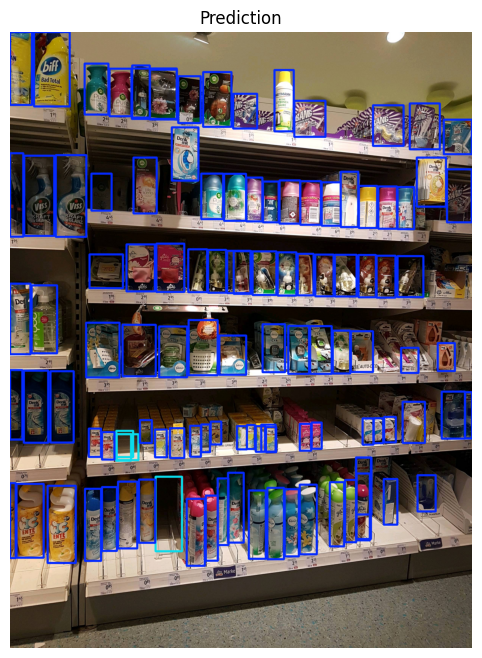

In [6]:
results = model(source=image_paths[0], save=True, save_dir='runs/detect/test')
results = model.predict(source=str(image_paths[0]), save=False)

rendered = results[0].plot(labels=False)
img = Image.fromarray(rendered[..., ::-1])

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Prediction')

# Ground Thruth

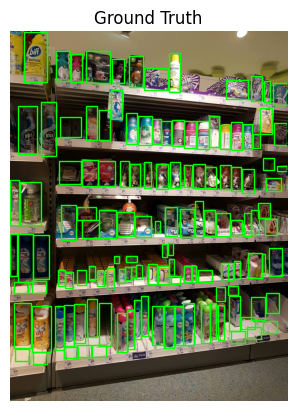

In [7]:

img = Image.open(image_paths[0])
w, h = img.size

with open(label_paths[0], "r") as f:
    labels = [list(map(float, line.strip().split())) for line in f]

fig, ax = plt.subplots()
ax.imshow(img)

for cls, xc, yc, bw, bh in labels:
    x = (xc - bw / 2) * w
    y = (yc - bh / 2) * h
    bw_pix = bw * w
    bh_pix = bh * h
    rect = patches.Rectangle((x, y), bw_pix, bh_pix, linewidth=1, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)


plt.axis('off')
plt.title('Ground Truth')
plt.show()

# Evaluation on Validation Dataset

In [8]:
model.val(data="data/data.yaml", split="val")

Ultralytics 8.3.168 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11871MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7711.3±675.8 MB/s, size: 939.8 KB)


val: Scanning data/labels/train... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<00:00, 720.43it/s]

val: New cache created: data/labels/train.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all         99      15102      0.594      0.555      0.563      0.322
                object         99      13932      0.823      0.868      0.908      0.567
                 empty         88       1170      0.365      0.242      0.218     0.0772
Speed: 1.3ms preprocess, 7.1ms inference, 0.0ms loss, 41.9ms postprocess per image
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/val30


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7086f3246e00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Evaluation on Test Dataset

In [9]:
model.val(data="data/data.yaml", split="test")

Ultralytics 8.3.168 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11871MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4567.7±2007.1 MB/s, size: 1589.2 KB)


val: Scanning data/labels/train... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 663.00it/s]

val: New cache created: data/labels/train.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


                   all        100      16888      0.591      0.542      0.542      0.301
                object        100      15811      0.821      0.839       0.88       0.53
                 empty         87       1077      0.362      0.245      0.204     0.0718
Speed: 1.3ms preprocess, 10.5ms inference, 0.0ms loss, 27.9ms postprocess per image
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/val31


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7086e8714bb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804